In [8]:
from util import *
from metrics import *
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [9]:
years = range(2009, 2019) # Don't include 2018 because many airports were added that weren't in the other years

In [10]:
graphs = []  # save as array of networks
for i in years:
    eval(f"graphs.append(create_graph(pd.read_csv('data/{i}_grouped.csv')))")  # use `eval` for automation

In [11]:
# for i in years: 
#     eval(f"viz_map(pd.read_csv('data/{i}_grouped.csv'), {i})")

In [17]:
# make graphs undirected and add up edges

graphs = [to_undirected_graph(i) for i in graphs]

In [13]:
num_nodes = []
num_edges = []
for i in graphs:
    print(i)
    num_nodes.append(i.number_of_nodes())
    num_edges.append(i.number_of_edges())


# print(graphs[-2].nodes())
# print(graphs[-1].nodes())

main_list = list(set(graphs[-1].nodes()) - set(graphs[-2].nodes()))
print(main_list)

DiGraph with 296 nodes and 4619 edges
DiGraph with 305 nodes and 4622 edges
DiGraph with 299 nodes and 4528 edges
DiGraph with 312 nodes and 4646 edges
DiGraph with 319 nodes and 4730 edges
DiGraph with 325 nodes and 4738 edges
DiGraph with 322 nodes and 4696 edges
DiGraph with 313 nodes and 4591 edges
DiGraph with 318 nodes and 4776 edges
DiGraph with 356 nodes and 6361 edges
['BFF', 'FLO', 'HHH', 'SFB', 'LCK', 'PVU', 'HGR', 'PGV', 'STC', 'ART', 'PRC', 'DBQ', 'BLV', 'LWB', 'HVN', 'CMI', 'SMX', 'HTS', 'CNY', 'OWB', 'USA', 'DRT', 'YNG', 'SPN', 'PIE', 'SCK', 'SHD', 'LBF', 'OGS', 'PSM', 'SLN', 'LBL', 'CYS', 'LYH', 'VEL', 'BKG', 'AZA', 'RFD', 'OGD']


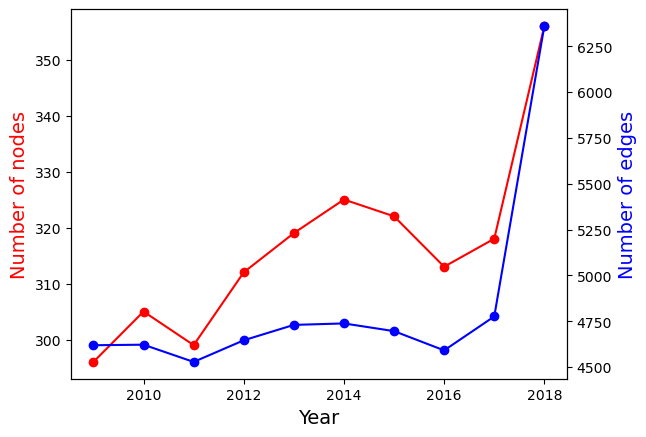

In [14]:
fig, ax = plt.subplots()
ax.plot(years, num_nodes, color="r")
ax.set_xlabel("Year", fontsize=14)
ax.scatter(years, num_nodes, color="r")
ax.set_ylabel("Number of nodes", color="red", fontsize=14)

ax2 = ax.twinx()
ax2.plot(years, num_edges, color="b")
ax2.scatter(years, num_edges, color="b")
ax2.set_ylabel("Number of edges", color="blue", fontsize=14)
plt.savefig(f"./images/nodes_edges.jpg", format="jpg", bbox_inches="tight")


In [15]:
mean_degree_list = []
for i in graphs:
    mean_degree_list.append(get_mean_degree(i))
    

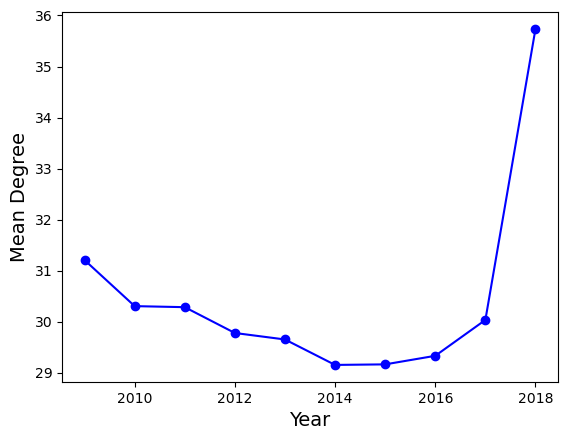

In [16]:
plt.plot(years, mean_degree_list, color="b")
plt.scatter(years, mean_degree_list, color="b")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Mean Degree", fontsize=14)
plt.savefig(f"./images/mean_degree.jpg", format="jpg", bbox_inches="tight")

In [18]:
efficiency_list = []
for i in graphs:
    efficiency_list.append(calculate_network_efficiency(i))

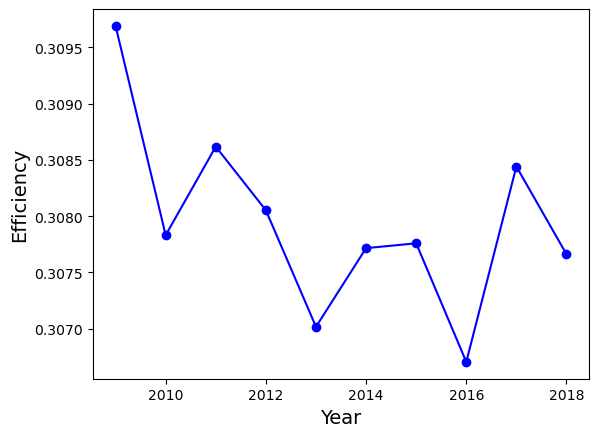

In [19]:
plt.plot(years, efficiency_list, color="b")
plt.scatter(years, efficiency_list, color="b")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Efficiency", fontsize=14)
plt.savefig(f"./images/network_efficiency.jpg", format="jpg", bbox_inches="tight")